# Aroon Indicator using the Python Technical Analysis Library (TA Lib)
* Aroon is a technical indicator that is used to identify trend changes in the price of an asset
* Measures the time between highs and time between lows of an asset over a period of time
* Consists of 2 lines -> an **up line** which measures the peiods since a high and a **down line** which measures number of periods between a low
* When the up-line is above the down line it shows bullish behaviour and when the down-line is above the up-line -> bearish bevahiour
* Crossovers can signal trend changes e.g. when the up-line crosses above down-line -> upward trend is starting
* Buy or sell signals can come too late -> after a substantial price movement has occured because the indicator is looking backwards
* Does not take into account the size of the move -> only the number of days since a high or low <br>
*Source: https://www.investopedia.com/terms/a/aroon.asp*
     
     

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import ta

In [25]:
# Read the file in from device
# Data was aquired from: https://in.finance.yahoo.com/quote/BTC-INR/history/
date_cols = ['Date']
# df = pd.read_csv('BTC_INR_2years_10Nov2020.csv', parse_dates=date_cols, index_col=['Date'])
df = pd.read_csv('BTC_INR.csv', parse_dates=date_cols, index_col=['Date'])

In [31]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Up,Down,Indicator
Date,,,,,,,,,
2019-10-24,531125.5625,534905.8750,528807.6250,532109.6250,532109.6250,1.155234e+12,NaN,NaN,NaN
2019-10-25,531911.8125,615708.6875,529882.0625,613524.0625,613524.0625,2.033467e+12,NaN,NaN,NaN
2019-10-26,614011.1875,709940.3750,613660.1875,654913.8125,654913.8125,3.152115e+12,NaN,NaN,NaN
2019-10-27,654682.5000,690656.6250,645532.4375,676643.4375,676643.4375,2.308897e+12,NaN,NaN,NaN
2019-10-28,677591.8125,693664.0625,654827.1250,654827.1250,654827.1250,2.189437e+12,NaN,NaN,NaN


In [32]:
# There is 1 day of missing values. Using linear interpolate to fill that value
df = df.interpolate()

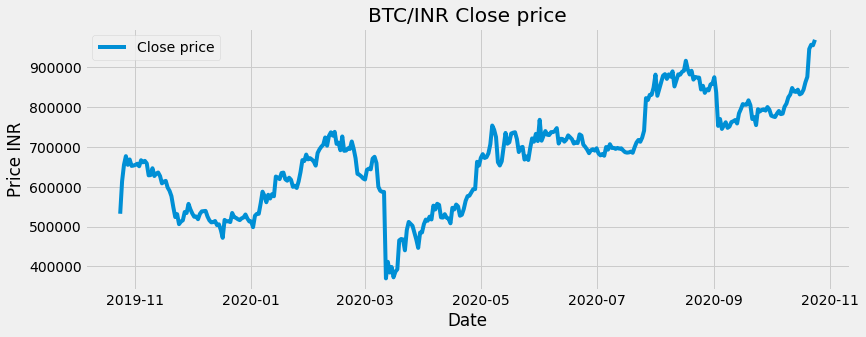

In [33]:
# Visualise
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close price')
plt.legend(loc='upper left')
plt.title('BTC/INR Close price')
plt.xlabel('Date')
plt.ylabel('Price INR')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [98]:
aroon_indicator = ta.trend.AroonIndicator(close=df['Close'], n=25, fillna=False)
df['Up'] = aroon_indicator.aroon_up()
df['Down'] = aroon_indicator.aroon_down()
df['Indicator'] = aroon_indicator.aroon_indicator()

In [88]:
def get_buy_sell_signal(dataframe):
    buy = []
    sell = []
    flag = -1
    high = 50
    low = -50

    for row in dataframe.itertuples():
        if row.Indicator > high: # Indicator line has crossed the high mark
            sell.append(np.nan)
            if flag != 1: # We have not crossed this mark before
                buy.append(row.Close)
                flag = 1 # We have crossed this mark
            else:
                buy.append(np.nan)
        
        elif row.Indicator < low: # Indicator line has crossed the low mark
            buy.append(np.nan)
            if flag != 0: # We have not crossed this mark before
                sell.append(row.Close)
                flag = 0 # We have crossed this mark
            else:
                sell.append(np.nan)
        
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    
    return (buy, sell)

In [89]:
df['Buy'] = get_buy_sell_signal(df)[0]
df['Sell'] = get_buy_sell_signal(df)[1]

In [90]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Up,Down,Indicator,Buy,Sell
Date,,,,,,,,,,,
2019-10-24,531125.5625,534905.8750,528807.6250,532109.6250,532109.6250,1.155234e+12,NaN,NaN,NaN,NaN,NaN
2019-10-25,531911.8125,615708.6875,529882.0625,613524.0625,613524.0625,2.033467e+12,NaN,NaN,NaN,NaN,NaN
2019-10-26,614011.1875,709940.3750,613660.1875,654913.8125,654913.8125,3.152115e+12,NaN,NaN,NaN,NaN,NaN
2019-10-27,654682.5000,690656.6250,645532.4375,676643.4375,676643.4375,2.308897e+12,NaN,NaN,NaN,NaN,NaN
2019-10-28,677591.8125,693664.0625,654827.1250,654827.1250,654827.1250,2.189437e+12,NaN,NaN,NaN,NaN,NaN


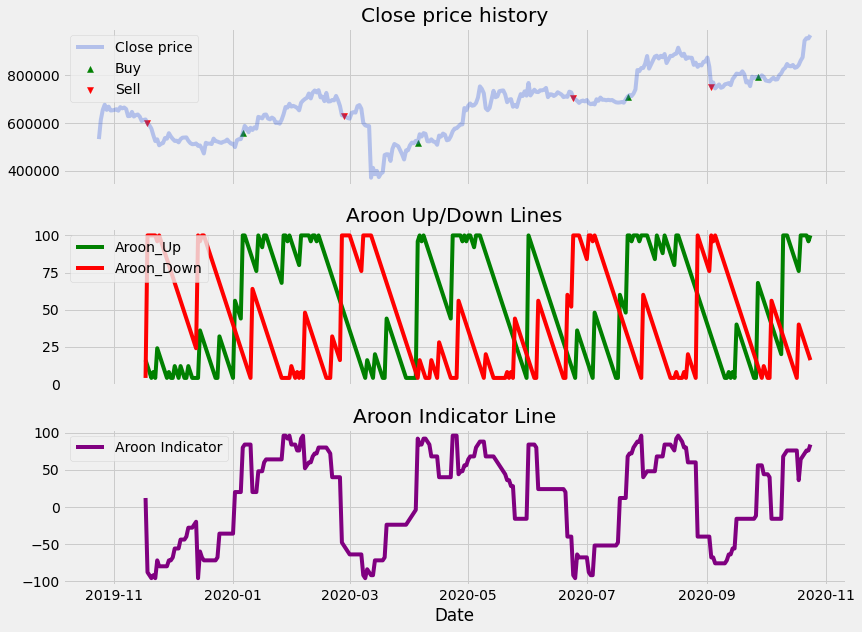

In [91]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12.2, 9))

ax1.plot(df.index, df['Close'], label='Close price', color='royalblue', alpha=0.35)
ax1.set_title('Close price history')
ax1.scatter(df.index, df['Buy'], color='green', label='Buy', marker='^', alpha=1)
ax1.scatter(df.index, df['Sell'], color='red', label='Sell', marker='v', alpha=1)
ax1.legend(loc='upper left')
ax1.ticklabel_format(style='plain', axis='y')

ax2.set_title('Aroon Up/Down Lines')
ax2.plot(df.index, df['Up'], label='Aroon_Up', color='green')
ax2.plot(df.index, df['Down'], label='Aroon_Down', color='red')
ax2.legend(loc='upper left')

ax3.set_title('Aroon Indicator Line')
ax3.plot(df.index, df['Indicator'], label='Aroon Indicator', color='purple')
ax3.legend(loc='upper left')
ax3.set_xlabel('Date')

plt.tight_layout()
plt.show()


In [92]:
buys = df[df['Buy'].notnull()]
sells = df[df['Sell'].notnull()]

In [93]:
def get_buy_sell_pairs(buys_df, sells_df):
    ''' Takes a buy dataframe (buys_df) & and sell dataframe (sells_df)
        and returns buy/sell pairs such that the buy date is before the 
        sell date.    
    '''
    pairs = []
    date_set = set()

    for buy_date, buy_row in buys_df.iterrows():
        for sell_date, sell_row in sells_df.iterrows():
            if (buy_date.date() not in date_set) and (sell_date.date() not in date_set) and (buy_date.date() < sell_date.date()):
                pairs.append((buy_row['Buy'], sell_row['Sell']))
                date_set.add(buy_date.date())
                date_set.add(sell_date.date())
    return pairs

In [94]:
buy_sell_pairs = get_buy_sell_pairs(buys, sells)
buy_sell_pairs

[(557805.0, 629795.5), (517755.6875, 705452.875), (710687.8125, 752531.375)]

In [95]:
def get_trade_value(buy_price, sell_price, stake):
    ''' Calculates the profit/loss of a sale given 
        the purchase price of an asset (buy_price), 
        the sales price of the asset (sell_price) &
        and the amount invested in the asset'''
    BTC_one_INR = 1/buy_price
    amount_purchased = BTC_one_INR * stake
    sales_value = amount_purchased * sell_price
    return round(sales_value - stake,2)

In [96]:
# Get the profit/loss of executing the buy-sell for 
stake_bid = 10000 
sale_values = [get_trade_value(b,s,stake_bid) for b,s in buy_sell_pairs]
sale_values

[1290.6, 3625.21, 588.78]

In [97]:
print(f'We would have made INR {np.round(np.sum(sale_values),2)} by following Aroon strategy and staking INR {stake_bid:,} each on {len(sale_values)} trades over a period of a {(df.index[-1]-df.index[0]).days} days.\nThis would have yielded a ROI of {round(np.sum(sale_values)/(stake_bid* len(sale_values))*100,2)}%.\nThis does not take into account exchange fees')

We would have made INR 5504.59 by following Aroon strategy and staking INR 10,000 each on 3 trades over a period of a 366 days.
This would have yielded a ROI of 18.35%.
This does not take into account exchange fees
